<a href="https://colab.research.google.com/github/imvk31/tennis_MatchChartingProject/blob/master/Serve_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tennis Serve Prediction

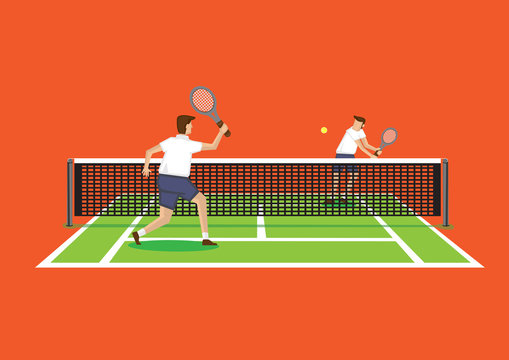

#Let us divide the problem into different Machine Learning Partitions



1.   **Ideation**: Align on the key problem to solve, and the potential data inputs to consider for the solution.

2.   **Data preparation**: Collect and get the data in a useful format for a model to digest and learn from.

3.   **Prototyping and testing**: Build a model or set of models to solve the problem, test how well they perform and iterate until you have a model that gives satisfactory results.

4.   **Productization**: Stabilize and scale your model as well as your data collection and processing to produce useful outputs in your production environment.


#Data Preperation



1.   Our Aim is to predict the serve direction.
2.   We have two datasets where the attributes that contribute much to the serve direction are resided. Namely the Matches Dataset and the Points Dataset.

##Matches Dataset
Comprises of different matches with total number of matches being ***2573*** ranging from the year *1970 to 2020*. However we consider the recent year matches.

##Points Dataset
Points dataset contains entries for each point scored in a particular match. Attributes like *score, serve_direction, serve_outcome, Tie Break set, Tie Break point* etc will be available in this dataset.


#Matches Dataset Data Preperation

##Steps in handling Matches Dataset

1.  Loading the Matches Dataset
2.  Identifying the Missing values
3.  Handling the Missing Values
4.  Identifying the Outliers
5.  Handling the Outliers

###Loading the Matches Dataset

In [154]:
import pandas as pd

In [155]:
matches = pd.read_csv("/content/drive/MyDrive/Cleaned_data/match_data_cleaned.csv", engine = 'python',error_bad_lines=False)
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   match_id                    2573 non-null   object
 1   Player 1                    2573 non-null   object
 2   Player 2                    2573 non-null   object
 3   Pl 1 hand                   2516 non-null   object
 4   Pl 2 hand                   2522 non-null   object
 5   Gender                      2573 non-null   object
 6   Date                        2573 non-null   int64 
 7   Tournament                  2573 non-null   object
 8   Round                       2573 non-null   object
 9   Time                        1402 non-null   object
 10  Court                       1803 non-null   object
 11  Surface                     2573 non-null   object
 12  Umpire                      1500 non-null   object
 13  Best of                     2573 non-null   int6

Identifying the unwanted attributes that do not support for the Serve Direction from the Matches Dataset.

1. Gender
2. Date
3. Tournament
4. Time
5. Umpire
6. Charted by
7. Court

In [156]:
#Dropping the unwanted columns
matches.drop(columns=['Date', 'Tournament', 'Gender', 'Time', 'Umpire','Charted by','Court'], inplace=True)

#Simple Description of the Matches Dataset
display(matches.describe())

,Best of,Final TB?,Year,best_of_game,regular_tiebreak_trigger,final_set_tiebreak_trigger
count,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000
mean,3.574427,0.830159,2010.149242,5.996113,5.994170,4.937816
std,0.905100,0.428740,9.890628,0.088096,0.132144,2.514194
min,3.000000,0.000000,1970.000000,4.000000,3.000000,0.000000
25%,3.000000,1.000000,2005.000000,6.000000,6.000000,6.000000
50%,3.000000,1.000000,2014.000000,6.000000,6.000000,6.000000
75%,5.000000,1.000000,2018.000000,6.000000,6.000000,6.000000
max,5.000000,2.000000,2020.000000,6.000000,6.000000,12.000000


**Visualization in the Matches Dataset**

Number of Matches Played in each Year

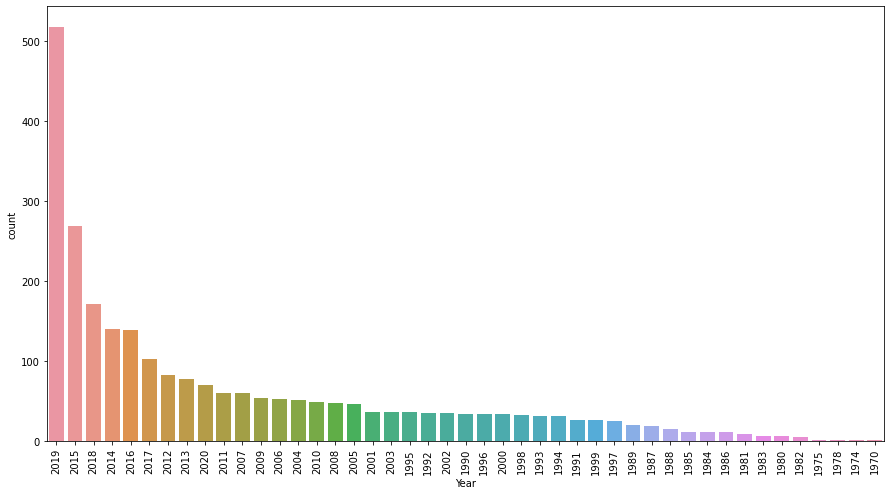

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.countplot(x='Year', data=matches,order = matches['Year'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

Comaparing the Best of played in matches dataset.

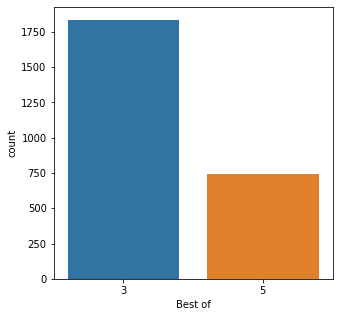

In [158]:
matches['Best of'].unique()
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.countplot(x='Best of', data=matches,order = matches['Best of'].value_counts().index)
plt.xticks(rotation = 0)
plt.show()

**Best of Games** in the Matches Dataset

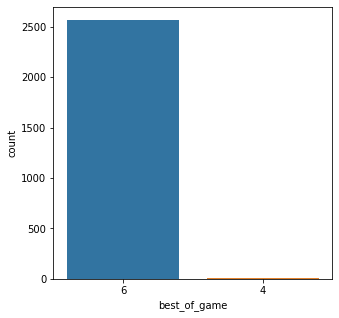

In [159]:
matches['best_of_game'].unique()

plt.figure(figsize=(5,5))
sns.countplot(x='best_of_game', data=matches,order = matches['best_of_game'].value_counts().index)
plt.xticks(rotation = 0)
plt.show()

#This shows most of the matches are played for best of 6 game, A very few games are played for best of 4

Final TB? in the Matches Data

array([1, 2, 0])

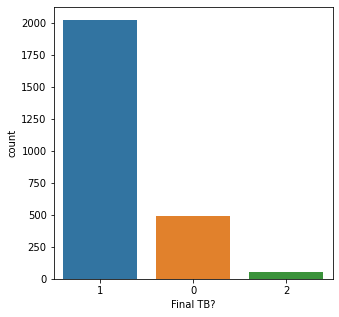

In [160]:
display(matches['Final TB?'].unique())

matches['Final TB?'].unique()

plt.figure(figsize=(5,5))
sns.countplot(x='Final TB?', data=matches,order = matches['Final TB?'].value_counts().index)
plt.xticks(rotation = 0)
plt.show()

regular_tiebreak_trigger gist in all matches

array([6, 3])

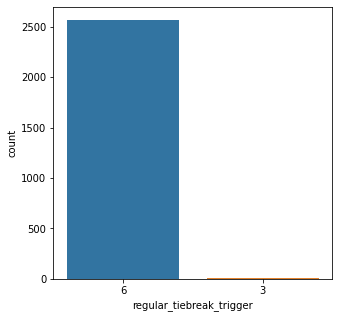

In [161]:
display(matches['regular_tiebreak_trigger'].unique())

plt.figure(figsize=(5,5))
sns.countplot(x='regular_tiebreak_trigger', data=matches,order = matches['regular_tiebreak_trigger'].value_counts().index)
plt.xticks(rotation = 0)
plt.show()

final_set_tiebreak_trigger

array([ 6,  3, 12,  0])

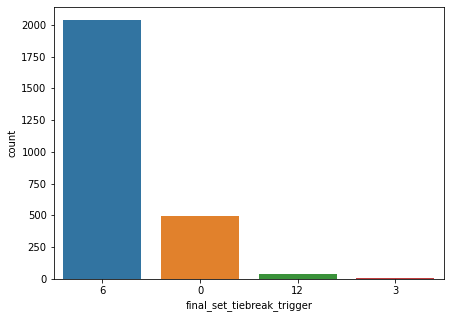

In [162]:
display(matches['final_set_tiebreak_trigger'].unique())

plt.figure(figsize=(7,5))
sns.countplot(x='final_set_tiebreak_trigger', data=matches,order = matches['final_set_tiebreak_trigger'].value_counts().index)
plt.xticks(rotation = 0)
plt.show()

Identifying the Missing, null and distinct values in Matches Dataset.


In [163]:
for i in matches.columns:
    print('\tWe will look into the attribute :',i)
    print('\tTotal number of Observations :',matches[i].size)
    print('\tCardinality is : ',matches[i].nunique())
    print('\tNull values : ',matches[i].isnull().sum())
    print('\n')

#There are no missing values in the matches dataset

	We will look into the attribute : match_id
	Total number of Observations : 2573
	Cardinality is :  2573
	Null values :  0


	We will look into the attribute : Player 1
	Total number of Observations : 2573
	Cardinality is :  418
	Null values :  0


	We will look into the attribute : Player 2
	Total number of Observations : 2573
	Cardinality is :  386
	Null values :  0


	We will look into the attribute : Pl 1 hand
	Total number of Observations : 2573
	Cardinality is :  2
	Null values :  57


	We will look into the attribute : Pl 2 hand
	Total number of Observations : 2573
	Cardinality is :  2
	Null values :  51


	We will look into the attribute : Round
	Total number of Observations : 2573
	Cardinality is :  12
	Null values :  0


	We will look into the attribute : Surface
	Total number of Observations : 2573
	Cardinality is :  12
	Null values :  0


	We will look into the attribute : Best of
	Total number of Observations : 2573
	Cardinality is :  2
	Null values :  0


	We will look in

Data Quality Report of Matches Dataset



1.   Categorical Attributes
2.   Continous Attributes



Data Quality Report for Categorical Attributes

In [164]:
def get_categorical_data_quality_report(cat_data):
    Data_Quality_Report = pd.DataFrame()

    Data_Quality_Report['Count'] = cat_data.count()                   
    Data_Quality_Report['%Miss'] = round(pd.isnull(cat_data).sum() * 100 / cat_data.count(),3)
    Data_Quality_Report['Card.'] = cat_data.apply(pd.Series.nunique)  

    cnt = 0
    cat_attr_dict = {}
    for (feature, series) in cat_data.iteritems():
        temp_dict = {}
        for i in series.tolist():
            if i not in temp_dict:
                temp_dict[i] = 0
            temp_dict[i] += 1
        cat_attr_dict[feature] = sorted(temp_dict.items(), key=lambda x: x[1], reverse=True)        
        cnt += 1

    attr_mode_dict = {}
    for name in cat_attr_dict:
        temp_arr = []
        temp_arr.append(cat_attr_dict[name][0][0])    
        temp_arr.append(cat_attr_dict[name][0][1])
        temp_arr.append(cat_attr_dict[name][1][0])
        temp_arr.append(cat_attr_dict[name][1][1])
        attr_mode_dict[name] = temp_arr

    df_mode = pd.DataFrame(attr_mode_dict).T
    Data_Quality_Report['Mode'] = df_mode.iloc[:, 0] 
    Data_Quality_Report['Mode_Freq.'] = df_mode.iloc[:, 1]
    Data_Quality_Report['Mode_%'] = Data_Quality_Report['Mode_Freq.'] * 100 / cat_data.count()
    Data_Quality_Report['2nd_Mode'] = df_mode.iloc[:, 2]
    Data_Quality_Report['2nd_Mode_Freq.'] = df_mode.iloc[:, 3]
    Data_Quality_Report['2nd_Mode_%'] = Data_Quality_Report['2nd_Mode_Freq.'] * 100 / cat_data.count()
    return Data_Quality_Report

categorical_features = matches[['match_id','Player 1','Player 2','Pl 1 hand','Pl 2 hand','Round', 'Surface','best_of_game','regular_tiebreak_trigger','final_set_tiebreak_trigger']]
 
print("\n[ Categorical Data Quality Report : ]\n")
categorical_features_report = get_categorical_data_quality_report(categorical_features)
display(categorical_features_report)


[ Categorical Data Quality Report : ]



,Count,%Miss,Card.,Mode,Mode_Freq.,Mode_%,2nd_Mode,2nd_Mode_Freq.,2nd_Mode_%
match_id,2573,0.000,2573,20200307-M-Davis_Cup_WG_II-RR-Ernests_Gulbis-M...,1,0.0388651,20200307-M-Davis_Cup_Qualifiers-RR-Alexander_B...,1,0.0388651
Player 1,2573,0.000,418,roger_federer,298,11.5818,novak_djokovic,202,7.85076
Player 2,2573,0.000,386,rafael_nadal,167,6.49048,roger_federer,150,5.82977
Pl 1 hand,2516,2.266,2,r,2218,88.1558,l,298,11.8442
Pl 2 hand,2522,2.022,2,r,2164,85.8049,l,358,14.1951
Round,2573,0.000,12,f,670,26.0396,sf,602,23.3968
Surface,2573,0.000,12,hard,1579,61.3681,clay,579,22.5029
best_of_game,2573,0.000,2,6,2568,99.8057,4,5,0.194326
regular_tiebreak_trigger,2573,0.000,2,6,2568,99.8057,3,5,0.194326
final_set_tiebreak_trigger,2573,0.000,4,6,2037,79.1683,0,492,19.1216


Data Quality Report for Continous Attributes in Matches Dataset

In [165]:
# Let us look into the Continous Data Data Quality Report

def data_quality_Continous(Data_Frame):
    Data_Quality_Report = pd.DataFrame()
    
    Data_Quality_Report['Count'] = Data_Frame.count()                              
    Data_Quality_Report['%Miss'] = round((Data_Frame.isnull().sum()/ Data_Frame.count()) * (100),3)  
    Data_Quality_Report['Card.'] = Data_Frame.apply(pd.Series.nunique)             
    Data_Quality_Report['Min'] = Data_Frame.min()                                  
    Data_Quality_Report['1st_Qrt'] = Data_Frame.quantile([0.25]).T                 
    Data_Quality_Report['Mean'] = round(Data_Frame.mean(),2)                                
    Data_Quality_Report['Median'] = Data_Frame.median()                            
    Data_Quality_Report['3rd_Qrt'] = Data_Frame.quantile([0.75]).T                 
    Data_Quality_Report['Max'] = Data_Frame.max()                                  
    Data_Quality_Report['Std.Dev.'] = round(Data_Frame.std(),2)                             
    
    return Data_Quality_Report

df_cont = matches[['Best of','Year','Final TB?','best_of_game','regular_tiebreak_trigger','final_set_tiebreak_trigger']]
df_cont_report = data_quality_Continous(df_cont)
display(df_cont_report)

,Count,%Miss,Card.,Min,1st_Qrt,Mean,Median,3rd_Qrt,Max,Std.Dev.
Best of,2573,0.0,2,3,3.0,3.57,3.0,5.0,5,0.91
Year,2573,0.0,45,1970,2005.0,2010.15,2014.0,2018.0,2020,9.89
Final TB?,2573,0.0,3,0,1.0,0.83,1.0,1.0,2,0.43
best_of_game,2573,0.0,2,4,6.0,6.00,6.0,6.0,6,0.09
regular_tiebreak_trigger,2573,0.0,2,3,6.0,5.99,6.0,6.0,6,0.13
final_set_tiebreak_trigger,2573,0.0,4,0,6.0,4.94,6.0,6.0,12,2.51


Correlation Matrix to know how attributes are correlated to each other.

In [166]:
corrMatrix = matches.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')                                                                   

,Best of,Final TB?,Year,best_of_game,regular_tiebreak_trigger,final_set_tiebreak_trigger
Best of,1.000000,-0.602137,-0.277468,-0.069513,-0.069513,-0.622620
Final TB?,-0.602137,1.000000,0.306349,-0.017483,-0.017483,0.897338
Year,-0.277468,0.306349,1.000000,-0.039494,-0.039494,0.296115
best_of_game,-0.069513,-0.017483,-0.039494,1.000000,1.000000,0.034016
regular_tiebreak_trigger,-0.069513,-0.017483,-0.039494,1.000000,1.000000,0.034016
final_set_tiebreak_trigger,-0.622620,0.897338,0.296115,0.034016,0.034016,1.000000


#Points Dataset Data Preperation


Reading points data into points DataFrame

In [167]:
points = pd.read_csv("/content/drive/MyDrive/Cleaned_data/point_data_cleaned_processed.csv", engine = 'python',error_bad_lines=False)

In [168]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439988 entries, 0 to 439987
Columns: 136 entries, match_id to player2_run_index
dtypes: bool(6), float64(32), int64(58), object(40)
memory usage: 438.9+ MB


Points Data altogether consists of 



1.   (6) boolean type attributes
2.   (32) float64 type attributes
3.   (58) int64 data type attributes
4.   (40) object type attributes



Removing the attributes that dont contribute to the Serve Direction.



1.   Pts, Serving, 1st, 2nd, Notes, Rally,
2.   isAce, isUnret, isRallyWinner, isForced
3.   isUnforced, isDouble, PtsAfter
4.   server_name, returner_name, player1, player2
5.   date, gender, tournament 






In [169]:
points = points.drop(columns=['Pts', 'Serving', '1st', '2nd', 'Notes', 'Rally','isAce', 'isUnret'])
points = points.drop(columns=['isRallyWinner', 'isForced', 'isUnforced', 'isDouble', 'PtsAfter'])
points = points.drop(columns=['server_name', 'returner_name', 'player1', 'player2','date','gender', 'tournament'])

In [170]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439988 entries, 0 to 439987
Columns: 116 entries, match_id to player2_run_index
dtypes: float64(32), int64(57), object(27)
memory usage: 389.4+ MB


Modifying the attributes

1. Converting Gm# to Gm number.

In [171]:
# Extarcting game number from 'Gm#' column
new = points["Gm#"].str.split(" ", n = 1, expand = True)
points["Gm#"] = new[0] 

Identifying the Missing total number of missing values, cardinality for each attribute.

In [172]:
for i in points.columns:
    print('\tWe will look into the attribute :',i)
    print('\tTotal number of Observations :',points[i].size)
    print('\tCardinality is : ',points[i].nunique())
    print('\tData type is',points[i].dtype)
    print('\tNull values : ',points[i].isnull().sum())
    print('\n')

	We will look into the attribute : match_id
	Total number of Observations : 439988
	Cardinality is :  2573
	Data type is object
	Null values :  0


	We will look into the attribute : Pt
	Total number of Observations : 439988
	Cardinality is :  569
	Data type is int64
	Null values :  0


	We will look into the attribute : Set1
	Total number of Observations : 439988
	Cardinality is :  3
	Data type is int64
	Null values :  0


	We will look into the attribute : Set2
	Total number of Observations : 439988
	Cardinality is :  3
	Data type is int64
	Null values :  0


	We will look into the attribute : Gm1
	Total number of Observations : 439988
	Cardinality is :  26
	Data type is int64
	Null values :  0


	We will look into the attribute : Gm2
	Total number of Observations : 439988
	Cardinality is :  25
	Data type is int64
	Null values :  0


	We will look into the attribute : Gm#
	Total number of Observations : 439988
	Cardinality is :  100
	Data type is object
	Null values :  1


	We will l

**Gm# **has one missing value. We will impute this missing value depending upon its previous or next entry.

Since the Pt for this point is 72 we 

In [173]:
display(points[points['Gm#'].isna()])
points.fillna(method='bfill', inplace=True)
display(points[points['Gm#'].isna()]) 

,match_id,Pt,Set1,Set2,Gm1,Gm2,Gm#,TbSet,TB?,TBpt,Svr,Ret,1stSV,2ndSV,1stIn,2ndIn,isRally1st,isRally2nd,Sv1,Sv2,rallyLen,PtWinner,isSvrWinner,GmW,Gm1.1,Gm2.1,SetW,Set1.1,Set2.1,rallyCount,serve_side,Sv1_direction,Sv1_outcome,Sv2_direction,Sv2_outcome,point_winner_name,round,server_shots_code,returner_shots_code,how_rally_end,...,returner_sets_to_win,returner_sets_to_loss,server_returner_sets_gap,returner_server_sets_gap,server_sets_to_win_norm,server_sets_to_loss_norm,returner_sets_to_win_norm,returner_sets_to_loss_norm,server_returner_sets_gap_norm,returner_server_sets_gap_norm,player1_point_score_before,player2_point_score_before,player1_simple_point_score_before,player2_simple_point_score_before,player1_simple_point_score_after,player2_simple_point_score_after,set_index,game_index_in_set,game_index,server_shot_count,service_count,returner_shot_count,player1_shot_count,player2_shot_count,server_shots_variety_count,returner_shots_variety_count,player1_shots_variety_count,player2_shots_variety_count,server_shot_direction_change_count,returner_shot_direction_change_count,player1_shot_direction_change_count,player2_shot_direction_change_count,server_net_shot_count,returner_net_shot_count,player1_net_shot_count,player2_net_shot_count,server_run_index,returner_run_index,player1_run_index,player2_run_index
156997,20080125-M-Australian_Open-SF-Jo_Wilfried_Tson...,72,1,0,2,1,NaN,1,0,NaN,2,1,0,NaN,1,NaN,1,0,4,NaN,5,2,1,0,2,1,0,1,0,5,ad,wide,in,unknown,NaN,rafael_nadal,sf,"f1,b3,","b28,f1,b2n#,",n#,...,2,3,-1,1,1.0,0.666667,0.666667,1.0,-0.5,0.5,15,30,1,2,1,3,2,4,NaN,2,1,3,3,2,0,0,0,0,2,1,1,2,1,0,0,1,3.506337,4.457125,4.457125,3.506337


,match_id,Pt,Set1,Set2,Gm1,Gm2,Gm#,TbSet,TB?,TBpt,Svr,Ret,1stSV,2ndSV,1stIn,2ndIn,isRally1st,isRally2nd,Sv1,Sv2,rallyLen,PtWinner,isSvrWinner,GmW,Gm1.1,Gm2.1,SetW,Set1.1,Set2.1,rallyCount,serve_side,Sv1_direction,Sv1_outcome,Sv2_direction,Sv2_outcome,point_winner_name,round,server_shots_code,returner_shots_code,how_rally_end,...,returner_sets_to_win,returner_sets_to_loss,server_returner_sets_gap,returner_server_sets_gap,server_sets_to_win_norm,server_sets_to_loss_norm,returner_sets_to_win_norm,returner_sets_to_loss_norm,server_returner_sets_gap_norm,returner_server_sets_gap_norm,player1_point_score_before,player2_point_score_before,player1_simple_point_score_before,player2_simple_point_score_before,player1_simple_point_score_after,player2_simple_point_score_after,set_index,game_index_in_set,game_index,server_shot_count,service_count,returner_shot_count,player1_shot_count,player2_shot_count,server_shots_variety_count,returner_shots_variety_count,player1_shots_variety_count,player2_shots_variety_count,server_shot_direction_change_count,returner_shot_direction_change_count,player1_shot_direction_change_count,player2_shot_direction_change_count,server_net_shot_count,returner_net_shot_count,player1_net_shot_count,player2_net_shot_count,server_run_index,returner_run_index,player1_run_index,player2_run_index


#Merging Matches and Points datasets

In [174]:
data = pd.merge(matches, points, on='match_id', how='inner')

#Extracting Roger Federer Serves.

In [175]:
data = data.loc[(data['Player 1'] == 'roger_federer') | (data['Player 2'] == 'roger_federer')]

In [176]:
# Making server column zero when federer is not serving and one when federer is serving
data.loc[((data['Player 1'] == 'roger_federer') & (data['Svr'] == 2)), 'Svr'] = 0
data.loc[((data['Player 2'] == 'roger_federer') & (data['Svr'] == 1)), 'Svr'] = 0
data.loc[((data['Player 2'] == 'roger_federer') & (data['Svr'] == 2)), 'Svr'] = 1

data = data.rename(columns={"Svr": "is_federer_server"})

In [177]:
data.loc[(data['Player 2'] == 'roger_federer'), 'Player 2'] = data.loc[(data['Player 2'] == 'roger_federer'), 'Player 1']
data['Player 1'] = "roger_federer"

# Changing 'Pl 1 hand and Pl 2 hand' to 'Federed hand and Opponent hand'
data.loc[(data['Player 2'] == 'roger_federer'), 'Pl 2 hand'] = data.loc[(data['Player 2'] == 'roger_federer'), 'Pl 1 hand']
data['Pl 1 hand'] = "r"
 
data = data.rename(columns={"Player 2": "Opponent","Pl 2 hand": "Opponent hand"})

We need only Federer Serving shots

In [178]:
data = data.drop(data[(data['is_federer_server'] != 1)].index)

# Encoding Attributes

Our Data  strings. We should either drop the string variables or convert them to categorical (one character for each different value of the variable).



In [179]:
from sklearn.preprocessing import LabelEncoder

data["match_id"]= data["match_id"].astype(str)
labelencoder_player = LabelEncoder()
data['match_id'] = labelencoder_player.fit_transform(data['match_id'])

In [180]:
data["player1_shots_code_w_position"]= data["player1_shots_code_w_position"].astype(str)
labelencoder_player = LabelEncoder()
data['player1_shots_code_w_position'] = labelencoder_player.fit_transform(data['player1_shots_code_w_position'])

In [181]:
data["player2_shots_code_w_position"]= data["player2_shots_code_w_position"].astype(str)
labelencoder_player = LabelEncoder()
data['player2_shots_code_w_position'] = labelencoder_player.fit_transform(data['player2_shots_code_w_position'])

In [182]:
data["TbSet"]= data["TbSet"].astype(str)
labelencoder_player = LabelEncoder()
data['TbSet'] = labelencoder_player.fit_transform(data['TbSet'])

In [183]:
data["Player 1"]= data["Player 1"].astype(str)
labelencoder_player = LabelEncoder()
data['Player 1'] = labelencoder_player.fit_transform(data['Player 1'])

In [184]:
data["Opponent"]= data["Opponent"].astype(str)
labelencoder_player = LabelEncoder()
data['Opponent'] = labelencoder_player.fit_transform(data['Opponent'])

In [185]:
data["Pl 1 hand"]= data["Pl 1 hand"].astype(str)
labelencoder_player = LabelEncoder()
data['Pl 1 hand'] = labelencoder_player.fit_transform(data['Pl 1 hand'])

In [186]:
data["Opponent hand"]= data["Opponent hand"].astype(str)
labelencoder_player = LabelEncoder()
data['Opponent hand'] = labelencoder_player.fit_transform(data['Opponent hand'])

In [187]:
data["Round"]= data["Round"].astype(str)
labelencoder_player = LabelEncoder()
data['Round'] = labelencoder_player.fit_transform(data['Round'])

In [188]:
data["Surface"]= data["Surface"].astype(str)
labelencoder_player = LabelEncoder()
data['Surface'] = labelencoder_player.fit_transform(data['Surface'])

In [189]:
data["Sv1"]= data["Sv1"].astype(str)
labelencoder_player = LabelEncoder()
data['Sv1'] = labelencoder_player.fit_transform(data['Sv1'])

In [190]:
data["Sv2"]= data["Sv2"].astype(str)
labelencoder_player = LabelEncoder()
data['Sv2'] = labelencoder_player.fit_transform(data['Sv2'])

In [191]:
data["Sv1_direction"]= data["Sv1_direction"].astype(str)
labelencoder_player = LabelEncoder()
data['Sv1_direction'] = labelencoder_player.fit_transform(data['Sv1_direction'])

In [192]:
data["Sv1_outcome"]= data["Sv1_outcome"].astype(str)
labelencoder_player = LabelEncoder()
data['Sv1_outcome'] = labelencoder_player.fit_transform(data['Sv1_outcome'])

In [193]:
data["Sv2_outcome"]= data["Sv2_outcome"].astype(str)
labelencoder_player = LabelEncoder()
data['Sv2_outcome'] = labelencoder_player.fit_transform(data['Sv2_outcome'])

In [194]:
data["serve_side"]= data["serve_side"].astype(str)
labelencoder_player = LabelEncoder()
data['serve_side'] = labelencoder_player.fit_transform(data['serve_side'])

In [195]:
data["point_winner_name"]= data["point_winner_name"].astype(str)
labelencoder_player = LabelEncoder()
data['point_winner_name'] = labelencoder_player.fit_transform(data['point_winner_name'])

In [196]:
data["server_critical_point"]= data["server_critical_point"].astype(str)
labelencoder_player = LabelEncoder()
data['server_critical_point'] = labelencoder_player.fit_transform(data['server_critical_point'])

In [197]:
data["returner_critical_point"]= data["returner_critical_point"].astype(str)
labelencoder_player = LabelEncoder()
data['returner_critical_point'] = labelencoder_player.fit_transform(data['returner_critical_point'])

In [198]:
data["player1_point_score_before"]= data["player1_point_score_before"].astype(str)
labelencoder_player = LabelEncoder()
data['player1_point_score_before'] = labelencoder_player.fit_transform(data['player1_point_score_before'])

In [199]:
data["player2_point_score_before"]= data["player2_point_score_before"].astype(str)
labelencoder_player = LabelEncoder()
data['player2_point_score_before'] = labelencoder_player.fit_transform(data['player2_point_score_before'])

In [200]:
data["player1_shots_code_w_position"]= data["player1_shots_code_w_position"].astype(str)
labelencoder_player = LabelEncoder() 
data['player1_shots_code_w_position'] = labelencoder_player.fit_transform(data['player1_shots_code_w_position'])

In [201]:
data["server_critical_point"]= data["server_critical_point"].astype(str)
labelencoder_player = LabelEncoder()
data['server_critical_point'] = labelencoder_player.fit_transform(data['server_critical_point'])

In [202]:
data["returner_critical_point"]= data["returner_critical_point"].astype(str)
labelencoder_player = LabelEncoder()
data['returner_critical_point'] = labelencoder_player.fit_transform(data['returner_critical_point'])

In [203]:
data["player1_critical_point"]= data["player1_critical_point"].astype(str)
labelencoder_player = LabelEncoder()
data['player1_critical_point'] = labelencoder_player.fit_transform(data['player1_critical_point'])

In [204]:
data["player2_critical_point"]= data["player2_critical_point"].astype(str)
labelencoder_player = LabelEncoder()
data['player2_critical_point'] = labelencoder_player.fit_transform(data['player2_critical_point'])

In [205]:
data["round"]= data["round"].astype(str)
labelencoder_player = LabelEncoder()
data['round'] = labelencoder_player.fit_transform(data['round'])

In [206]:

data["server_shots_code"]= data["server_shots_code"].astype(str)
labelencoder_player = LabelEncoder()
data['server_shots_code'] = labelencoder_player.fit_transform(data['server_shots_code'])

In [207]:
data["returner_shots_code"]= data["returner_shots_code"].astype(str)
labelencoder_player = LabelEncoder()
data['returner_shots_code'] = labelencoder_player.fit_transform(data['returner_shots_code'])

In [208]:
data["how_rally_end"]= data["how_rally_end"].astype(str)
labelencoder_player = LabelEncoder()
data['how_rally_end'] = labelencoder_player.fit_transform(data['how_rally_end'])

In [209]:
data["player1_shots_code"]= data["player1_shots_code"].astype(str)
labelencoder_player = LabelEncoder()
data['player1_shots_code'] = labelencoder_player.fit_transform(data['player1_shots_code'])

In [210]:
data["player2_shots_code"]= data["player2_shots_code"].astype(str)
labelencoder_player = LabelEncoder()
data['player2_shots_code'] = labelencoder_player.fit_transform(data['player2_shots_code'])

In [211]:
data["server_shots_code_w_position"]= data["server_shots_code_w_position"].astype(str)
labelencoder_player = LabelEncoder()
data['server_shots_code_w_position'] = labelencoder_player.fit_transform(data['server_shots_code_w_position'])

In [212]:
data["returner_shots_code_w_position"]= data["returner_shots_code_w_position"].astype(str)
labelencoder_player = LabelEncoder()
data['returner_shots_code_w_position'] = labelencoder_player.fit_transform(data['returner_shots_code_w_position'])

In [213]:
data

,match_id,Player 1,Opponent,Pl 1 hand,Opponent hand,Round,Surface,Best of,Final TB?,Year,best_of_game,regular_tiebreak_trigger,final_set_tiebreak_trigger,Pt,Set1,Set2,Gm1,Gm2,Gm#,TbSet,TB?,TBpt,is_federer_server,Ret,1stSV,2ndSV,1stIn,2ndIn,isRally1st,isRally2nd,Sv1,Sv2,rallyLen,PtWinner,isSvrWinner,GmW,Gm1.1,Gm2.1,SetW,Set1.1,...,returner_sets_to_win,returner_sets_to_loss,server_returner_sets_gap,returner_server_sets_gap,server_sets_to_win_norm,server_sets_to_loss_norm,returner_sets_to_win_norm,returner_sets_to_loss_norm,server_returner_sets_gap_norm,returner_server_sets_gap_norm,player1_point_score_before,player2_point_score_before,player1_simple_point_score_before,player2_simple_point_score_before,player1_simple_point_score_after,player2_simple_point_score_after,set_index,game_index_in_set,game_index,server_shot_count,service_count,returner_shot_count,player1_shot_count,player2_shot_count,server_shots_variety_count,returner_shots_variety_count,player1_shots_variety_count,player2_shots_variety_count,server_shot_direction_change_count,returner_shot_direction_change_count,player1_shot_direction_change_count,player2_shot_direction_change_count,server_net_shot_count,returner_net_shot_count,player1_net_shot_count,player2_net_shot_count,server_run_index,returner_run_index,player1_run_index,player2_run_index
4454,447,0,99,0,1,8,3,5,2,2020,6,6,6,1,0,0,0,0,1,1,0,1.0,1,2,0,0.0,1,1.0,1,0,7,23,2,2,0,0,0,0,0,0,...,3,3,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,1,1,1,1.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1.040646,0.415865,1.040646,0.415865
4455,447,0,99,0,1,8,3,5,2,2020,6,6,6,2,0,0,0,0,1,1,0,1.0,1,2,0,0.0,0,1.0,0,1,20,23,4,2,0,0,0,0,0,0,...,3,3,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0,5,0,1,0,2,1,1,1.0,2,2,2,2,2,0,0,0,0,2,0,2,0,2,0,2,0,2.511564,1.456511,2.511564,1.456511
4456,447,0,99,0,1,8,3,5,2,2020,6,6,6,3,0,0,0,0,1,1,0,1.0,1,2,0,0.0,1,1.0,0,0,9,23,0,1,1,0,0,0,0,0,...,3,3,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0,10,0,2,1,2,1,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4457,447,0,99,0,1,8,3,5,2,2020,6,6,6,4,0,0,0,0,1,1,0,1.0,1,2,0,0.0,0,1.0,0,1,52,23,16,2,0,0,0,0,0,0,...,3,3,0,0,1.0,1.0,1.0,1.0,0.0,0.0,7,10,1,2,1,3,1,1,1.0,8,2,8,8,8,1,0,1,0,7,3,7,3,8,2,8,2,8.768113,13.564274,8.768113,13.564274
4458,447,0,99,0,1,8,3,5,2,2020,6,6,6,5,0,0,0,0,1,1,0,1.0,1,2,0,0.0,0,1.0,0,1,47,2,1,1,1,0,0,0,0,0,...,3,3,0,0,1.0,1.0,1.0,1.0,0.0,0.0,7,12,1,3,2,3,1,1,1.0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.415865,0.000000,0.415865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439840,332,0,51,0,1,8,3,3,1,2015,6,6,6,106,1,0,5,4,19,1,0,1.0,1,2,0,0.0,1,1.0,1,0,7,14,2,2,0,0,5,4,0,1,...,2,1,1,-1,0.5,1.0,1.0,0.5,1.0,-1.0,0,0,0,0,0,1,2,10,19.0,1,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1.753169,0.415865,1.753169,0.415865
439841,332,0,51,0,1,8,3,3,1,2015,6,6,6,107,1,0,5,4,19,1,0,1.0,1,2,0,0.0,1,1.0,1,0,39,14,1,1,1,0,5,4,0,1,...,2,1,1,-1,0.5,1.0,1.0,0.5,1.0,-1.0,0,5,0,1,1,1,2,10,19.0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0.000000,1.040646,0.000000,1.040646
439842,332,0,51,0,1,8,3,3,1,2015,6,6,6,108,1,0,5,4,19,1,0,1.0,1,2,1,0.0,1,1.0,1,0,39,14,4,1,1,0,5,4,0,1,...,2,1,1,-1,0.5,1.0,1.0,0.5,1.0,-1.0,7,5,1,1,2,1,2,10,19.0,2,1,2,2,2,2,0,2,0,1,1,1,1,2,0,2,0,4.089318,2.081292,4.089318,2.081292
439843,332,0,51,0,1,8,3,3,1,2015,6,6,6,109,1,0,5,4,19,1,0,1.0,1,2,0,0.0,1,1.0,1,0,39,14,2,1,1,0,5,4,0,1,...,2,1,1,-1,0.5,1.0,1.0,0.5,1.0,-1.0,13,5,2,1,3,1,2,10,19.0,1,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1.753169,1.040646,1.753169,1.040646


#Feature Selection

In [214]:
corrMatrix = data.corr()
corrMatrix.style.background_gradient(cmap='coolwarm') 

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [215]:
X = data.drop(['Sv1_direction', 'Sv1_outcome', 'Sv2_direction', 'Sv2_outcome'], axis=1)
y = data['Sv1_direction'] 

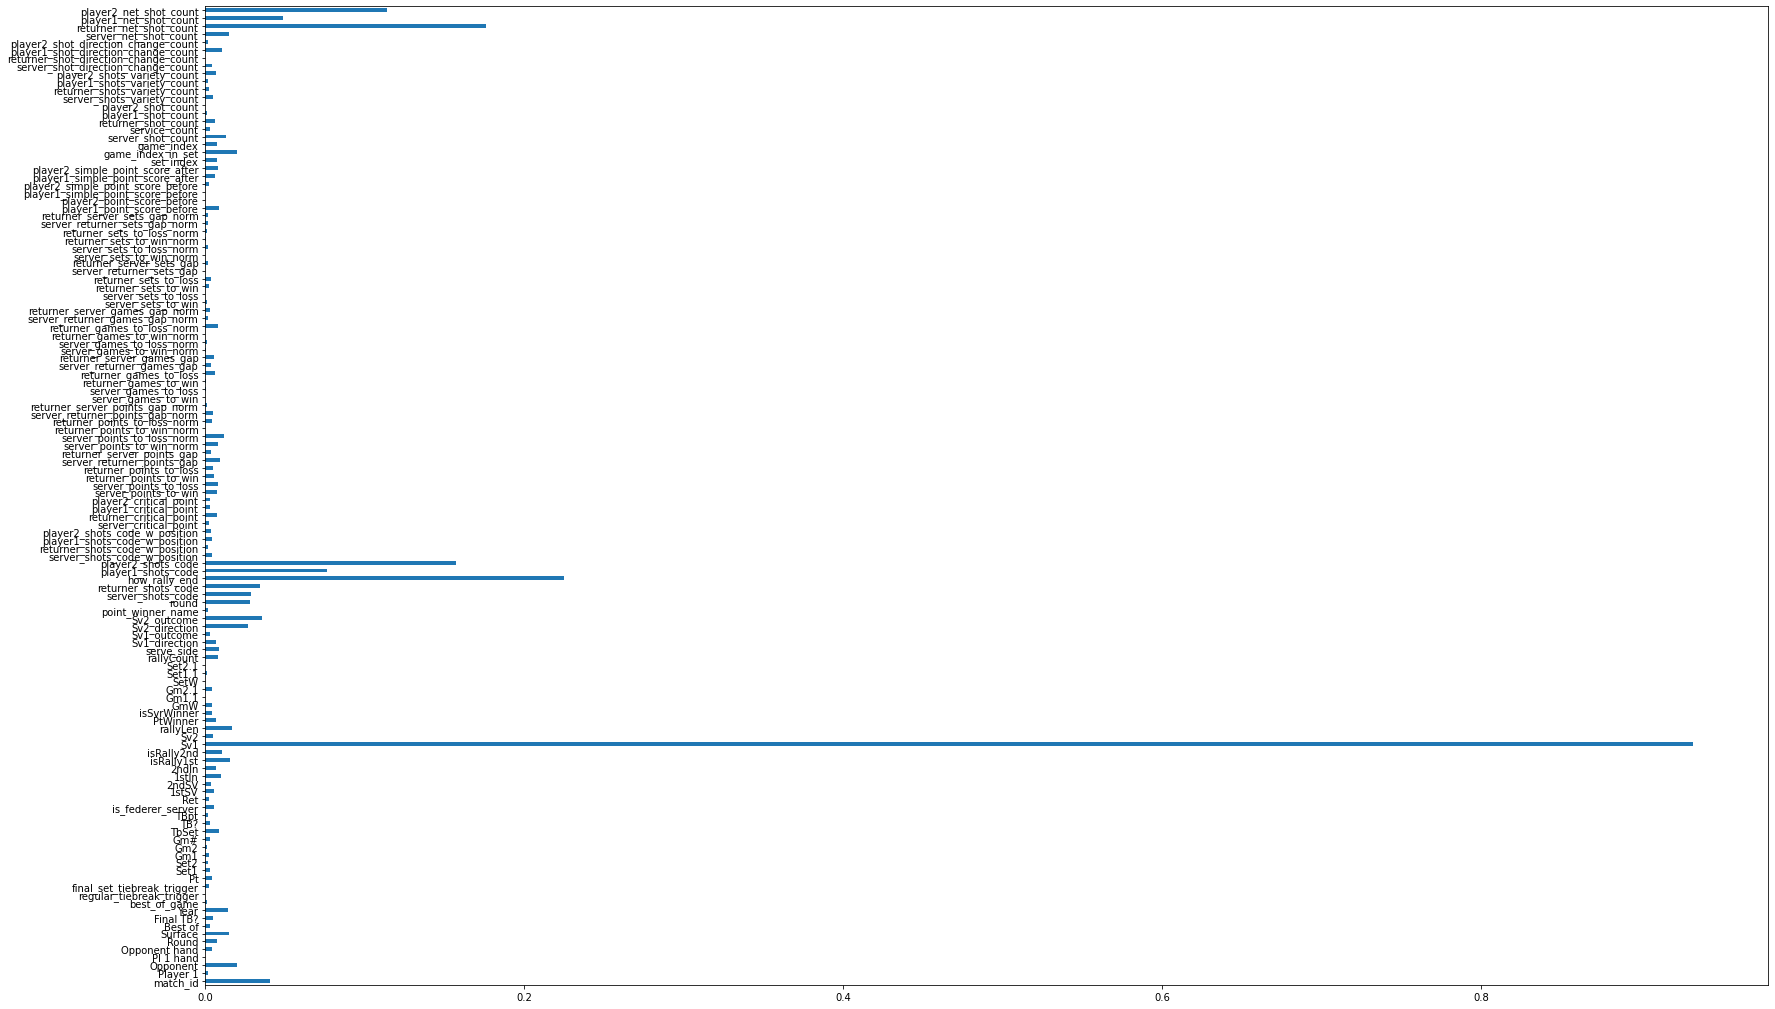

In [216]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(28,18))

importances = mutual_info_classif(X, y)
feature_importance = pd.Series(importances, data.columns[0: len(data.columns)-4])
feature_importance.plot(kind = 'barh')

#Removing the unwanted attributes that dont contribute to the Serve Direction

Removing Constant features
Constant features are the type of features that contain only one value for all the outputs in the dataset. Constant features provide no information that can help in classification of the record at hand. Therefore, it is advisable to remove all the constant features from the dataset.

In [217]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(X,y,test_size=0.2,random_state=41)

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(train_features)
len(train_features.columns[constant_filter.get_support()])
constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

print(len(constant_columns))
for column in constant_columns:
    print(column)

5
Player 1
Pl 1 hand
best_of_game
regular_tiebreak_trigger
is_federer_server


Removing the Constant Attributes from the Data

In [218]:
data = data.drop(columns = ['Player 1', 'Pl 1 hand', 'best_of_game', 'regular_tiebreak_trigger', 'is_federer_server'])

Removing Quasi-Constant features

Quasi-constant features, as the name suggests, are the features that are almost constant. In other words, these features have the same values for a very large subset of the outputs. Such features are not very useful for making predictions.

In [219]:
train_features, test_features, train_labels, test_labels = train_test_split(data.drop(labels=['Sv1_direction', 'Sv1_outcome', 'Sv2_direction', 'Sv2_outcome'], axis=1),data['Sv1_direction'],test_size=0.2,random_state=41)

qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(train_features)
len(train_features.columns[qconstant_filter.get_support()])
qconstant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

for column in qconstant_columns:
    print(column)

0


Removing Duplicate Features

Duplicate features are the features that have similar values. Duplicate features do not add any value to algorithm training, rather they add overhead and unnecessary delay to the training time. Therefore, it is always recommended to remove the duplicate features from the dataset before training.

In [220]:
train_features_T = train_features.T
train_features_T.shape

print(train_features_T.duplicated().sum())

unique_features = train_features_T.drop_duplicates(keep='first').T

unique_features.shape

duplicated_features = [dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
duplicated_features

unique_features = train_features_T.drop_duplicates(keep='first').T

unique_features.shape


13


(30216, 106)

In [222]:
duplicated_features

['round',
 'returner_points_to_win',
 'returner_points_to_loss',
 'returner_points_to_win_norm',
 'returner_points_to_loss_norm',
 'returner_games_to_win',
 'returner_games_to_loss',
 'returner_games_to_win_norm',
 'returner_games_to_loss_norm',
 'returner_sets_to_win',
 'returner_sets_to_loss',
 'returner_sets_to_win_norm',
 'returner_sets_to_loss_norm']

Dropping the duplicate features

In [223]:
data = data.drop(columns=['round','returner_points_to_win','returner_points_to_loss',
 'returner_points_to_win_norm','returner_points_to_loss_norm','returner_games_to_win',
 'returner_games_to_loss','returner_games_to_win_norm','returner_games_to_loss_norm',
 'returner_sets_to_win','returner_sets_to_loss','returner_sets_to_win_norm','returner_sets_to_loss_norm'])

Removing Correlated Features

In addition to the duplicate features, a dataset can also contain correlated features. Two or more than two features are correlated if they are close to each other in the linear space.



In [225]:
num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(data.select_dtypes(include=num_colums).columns)
paribas_data = data[numerical_columns]

data.shape

correlated_features = set()
correlation_matrix = data.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)


{'set_index', 'game_index', 'server_points_to_loss_norm', 'game_index_in_set', 'server_returner_games_gap_norm', 'server_run_index', 'returner_server_points_gap', 'isRally2nd', 'returner_server_points_gap_norm', 'server_points_to_win_norm', 'player1_simple_point_score_after', 'server_sets_to_loss_norm', 'final_set_tiebreak_trigger', 'player1_shots_variety_count', 'player1_simple_point_score_before', 'service_count', 'returner_run_index', 'returner_shot_count', 'player1_shot_direction_change_count', 'server_sets_to_win_norm', 'server_returner_points_gap_norm', 'isRally1st', 'player2_simple_point_score_before', 'returner_server_games_gap', 'player2_shot_count', 'returner_server_games_gap_norm', 'player1_shot_count', 'server_shot_count', 'player2_shot_direction_change_count', 'player1_run_index', 'server_shot_direction_change_count', 'player2_simple_point_score_after', 'returner_shot_direction_change_count', 'Sv1_direction', 'Gm2.1', 'server_returner_sets_gap_norm', 'Year', 'Gm1.1', 'retu

In [226]:
print(len(correlated_features))

46


#Implementing Machine Learning Algorithms

#For the 1st Serve Prediction

In [227]:
Xserve1_dir = data.drop(['Sv1_direction', 'Sv1_outcome', 'Sv2_direction', 'Sv2_outcome'], axis=1)
Yserve1_dir = data['Sv1_direction'] 

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xserve1_dir, Yserve1_dir, test_size=0.3, random_state=0, stratify=Yserve1_dir)

Logistic Regression

In [229]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

# Create an instance and fit the model 
lr_model = LogisticRegression(C= 1000)
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.7601270849880858


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [230]:
list_of_tuples = list(zip(y_test, y_pred))     
# Assign data to tuples.  
list_of_tuples   
# Converting lists of tuples into  
# pandas Dataframe.  
df = pd.DataFrame(list_of_tuples, 
                  columns = ['Actual', 'Predicted'])  

df

,Actual,Predicted
0,0,3
1,1,1
2,3,1
3,2,1
4,0,3
...,...,...
11326,2,1
11327,3,3
11328,3,1
11329,3,1


Decision Tree

In [231]:
from sklearn.tree import DecisionTreeClassifier
#Performing Decision Tree Classifier using Gini as criterion
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=1, min_samples_leaf=5) 

# Performing training
clf_gini.fit(X_train, y_train)

#Performing Decision Tree Classifier using Entropy as criterion
clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100, 
            max_depth = 1, min_samples_leaf = 5) 
  
# Performing training 
clf_entropy.fit(X_train, y_train)

#Prediction using DecisionTreeClassifier with Gini as criterion
y_pred = clf_gini.predict(X_test)
print('Gini based Accuracy ',clf_gini.score(X_test,y_test)) 

#Prediction using DecisionTreeClassifier with Entropy as criterion
y_pred = clf_gini.predict(X_test)
print('Entropy based Accuracy ',clf_entropy.score(X_test,y_test))

list_of_tuples = list(zip(y_test, y_pred))     
# Assign data to tuples.  
list_of_tuples   
# Converting lists of tuples into  
# pandas Dataframe.  
df = pd.DataFrame(list_of_tuples, 
                  columns = ['Actual', 'Predicted'])  
df

Gini based Accuracy  0.9223369517253552
Entropy based Accuracy  0.9223369517253552


,Actual,Predicted
0,0,1
1,1,1
2,3,3
3,2,1
4,0,1
...,...,...
11326,2,1
11327,3,3
11328,3,3
11329,3,3


K Nearest Neighbors

In [232]:
# Before making any actual predictions
# it is always a good practice to scale the features so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [233]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [234]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 105  238    0  451]
 [ 151 3505    2 1084]
 [   0   22   58    6]
 [ 164 1110    5 4430]]
              precision    recall  f1-score   support

           0       0.25      0.13      0.17       794
           1       0.72      0.74      0.73      4742
           2       0.89      0.67      0.77        86
           3       0.74      0.78      0.76      5709

    accuracy                           0.71     11331
   macro avg       0.65      0.58      0.61     11331
weighted avg       0.70      0.71      0.71     11331



Naive Bayes Classifier

In [235]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 505   77  146   66]
 [  30 3201 1502    9]
 [   0    3   80    3]
 [ 186   27 1534 3962]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       794
           1       0.97      0.68      0.80      4742
           2       0.02      0.93      0.05        86
           3       0.98      0.69      0.81      5709

    accuracy                           0.68     11331
   macro avg       0.67      0.73      0.58     11331
weighted avg       0.95      0.68      0.79     11331



Performing Linear Discriminant Analysis and Feeding this to Random Forest Classifier

In [236]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

#Performing LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#Implementation of Random Forest Classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 794    0    0    0]
 [   0 4742    0    0]
 [   0    3    0   83]
 [   0    1    0 5708]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       794
           1       1.00      1.00      1.00      4742
           2       0.00      0.00      0.00        86
           3       0.99      1.00      0.99      5709

    accuracy                           0.99     11331
   macro avg       0.75      0.75      0.75     11331
weighted avg       0.98      0.99      0.99     11331



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Serve1 Serve 1 outcome

In [98]:
X = data.drop(['Sv1_direction', 'Sv1_outcome', 'Sv2_direction', 'Sv2_outcome'], axis=1)
y = data['Sv1_outcome'] 

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.5144294413555732


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [102]:
list_of_tuples = list(zip(y_test, y_pred))     
# Assign data to tuples.  
list_of_tuples   
# Converting lists of tuples into  
# pandas Dataframe.  
df = pd.DataFrame(list_of_tuples, 
                  columns = ['Actual', 'Predicted'])  

df

,Actual,Predicted
0,16,13
1,9,13
2,13,13
3,13,13
4,16,13
...,...,...
11326,21,13
11327,21,13
11328,13,13
11329,9,13


Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
#Performing Decision Tree Classifier using Gini as criterion
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=1, min_samples_leaf=5) 

# Performing training
clf_gini.fit(X_train, y_train)

#Performing Decision Tree Classifier using Entropy as criterion
clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100, 
            max_depth = 1, min_samples_leaf = 5) 
  
# Performing training 
clf_entropy.fit(X_train, y_train)

#Prediction using DecisionTreeClassifier with Gini as criterion
y_pred = clf_gini.predict(X_test)
print('Gini based Accuracy ',clf_gini.score(X_test,y_test)) 

#Prediction using DecisionTreeClassifier with Entropy as criterion
y_pred = clf_gini.predict(X_test)
print('Entropy based Accuracy ',clf_entropy.score(X_test,y_test))

list_of_tuples = list(zip(y_test, y_pred))     
# Assign data to tuples.  
list_of_tuples   
# Converting lists of tuples into  
# pandas Dataframe.  
df = pd.DataFrame(list_of_tuples, 
                  columns = ['Actual', 'Predicted'])  
df

Gini based Accuracy  0.638337304739211
Entropy based Accuracy  0.6455740887829847


,Actual,Predicted
0,16,16
1,9,16
2,13,13
3,13,13
4,16,16
...,...,...
11326,21,16
11327,21,16
11328,13,13
11329,9,16


K Nearest Neighbors

In [104]:
# Before making any actual predictions
# it is always a good practice to scale the features so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [108]:
from sklearn.neighbors import KNeighborsClassifier

#Implementin K Neighbors Classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#Accuracy in Predicting the Serve Outcome
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6693142705851205


Naive Bayes Classifier

In [110]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6314535345512311


Performing Linear Discriminant Analysis and Feeding this to Random Forest Classifier

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

#Performing LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#Implementation of Random Forest Classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7326802577001147


#Predicting Serve 2 Direction

In [138]:
X = data.drop(['Sv1_direction', 'Sv1_outcome', 'Sv2_direction', 'Sv2_outcome'], axis=1)
y = data['Sv2_direction'] 

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=Yserve1_dir)

Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.6307475068396434


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier
#Performing Decision Tree Classifier using Gini as criterion
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=1, min_samples_leaf=5) 

# Performing training
clf_gini.fit(X_train, y_train)

#Performing Decision Tree Classifier using Entropy as criterion
clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100, 
            max_depth = 1, min_samples_leaf = 5) 
  
# Performing training 
clf_entropy.fit(X_train, y_train)

#Prediction using DecisionTreeClassifier with Gini as criterion
y_pred = clf_gini.predict(X_test)
print('Gini based Accuracy ',clf_gini.score(X_test,y_test)) 

#Prediction using DecisionTreeClassifier with Entropy as criterion
y_pred = clf_gini.predict(X_test)
print('Entropy based Accuracy ',clf_entropy.score(X_test,y_test))


Gini based Accuracy  0.7774247639219839
Entropy based Accuracy  0.7774247639219839


K Nearest Neighbors

In [118]:
# Before making any actual predictions
# it is always a good practice to scale the features so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [119]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 534  204  108  363]
 [ 350  746  152   65]
 [  28   18 7000   10]
 [ 457  121  201  974]]
              precision    recall  f1-score   support

        body       0.39      0.44      0.41      1209
           t       0.69      0.57      0.62      1313
     unknown       0.94      0.99      0.96      7056
        wide       0.69      0.56      0.62      1753

    accuracy                           0.82     11331
   macro avg       0.68      0.64      0.65     11331
weighted avg       0.81      0.82      0.81     11331



Naive Bayes Classifier

In [121]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1172   37    0    0]
 [   0 1313    0    0]
 [   0    0 7056    0]
 [  20    1    0 1732]]
              precision    recall  f1-score   support

        body       0.98      0.97      0.98      1209
           t       0.97      1.00      0.99      1313
     unknown       1.00      1.00      1.00      7056
        wide       1.00      0.99      0.99      1753

    accuracy                           0.99     11331
   macro avg       0.99      0.99      0.99     11331
weighted avg       0.99      0.99      0.99     11331



Performing Linear Discriminant Analysis and Feeding this to Random Forest Classifier

In [122]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

#Performing LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#Implementation of Random Forest Classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0    0 1209]
 [   0    0    0 1313]
 [   0    0 7056    0]
 [   0    0    1 1752]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        body       0.00      0.00      0.00      1209
           t       0.00      0.00      0.00      1313
     unknown       1.00      1.00      1.00      7056
        wide       0.41      1.00      0.58      1753

    accuracy                           0.78     11331
   macro avg       0.35      0.50      0.40     11331
weighted avg       0.69      0.78      0.71     11331



In [ ]:
Xserve1_out = data.drop(['Sv1_direction', 'Sv1_outcome', 'Sv2_direction', 'Sv2_outcome'], axis=1)
Yserve1_out = data['Sv1_outcome'] 

In [ ]:
from sklearn.model_selection import train_test_split
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(Xserve1_out, Yserve1_out, test_size=0.3, random_state=0, stratify=Yserve1_dir)

#Predicting Serve 2 Outcome

In [141]:
X = data.drop(['Sv1_direction', 'Sv1_outcome', 'Sv2_direction', 'Sv2_outcome'], axis=1)
y = data['Sv2_outcome'] 

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy) 

0.3819609919689348


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
#Performing Decision Tree Classifier using Gini as criterion
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=1, min_samples_leaf=5) 

# Performing training
clf_gini.fit(X_train, y_train)

#Performing Decision Tree Classifier using Entropy as criterion
clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100, 
            max_depth = 1, min_samples_leaf = 5) 
  
# Performing training 
clf_entropy.fit(X_train, y_train)

#Prediction using DecisionTreeClassifier with Gini as criterion
y_pred = clf_gini.predict(X_test)
print('Gini based Accuracy ',clf_gini.score(X_test,y_test)) 

#Prediction using DecisionTreeClassifier with Entropy as criterion
y_pred = clf_gini.predict(X_test)
print('Entropy based Accuracy ',clf_entropy.score(X_test,y_test))


Gini based Accuracy  0.3748124613891095
Entropy based Accuracy  0.37851910687494483


,Actual,Predicted
0,10,5
1,2,5
2,10,5
3,10,5
4,5,5
...,...,...
11326,5,5
11327,5,5
11328,2,5
11329,2,5


K Nearest Neighbors

In [131]:
# Before making any actual predictions
# it is always a good practice to scale the features so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [132]:
from sklearn.neighbors import KNeighborsClassifier

#Implementin K Neighbors Classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#Accuracy in Predicting the Serve Outcome
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.45529962051010503


Naive Bayes Classifier

In [133]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.03741946871414703


Performing Linear Discriminant Analysis and Feeding this to Random Forest Classifier

In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

#Performing LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#Implementation of Random Forest Classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.38328479392816167
